In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense,MaxPool2D
import numpy as np
from keras.preprocessing import image
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
try:
    from tensorflow.python.util import module_wrapper as deprecation
except ImportError:
    from tensorflow.python.util import deprecation_wrapper as deprecation
deprecation._PER_MODULE_WARNING_LIMIT = 0

In [3]:
nbatch = 128
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10.,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r'C:\Users\hp\OneDrive\Desktop\capstone\Sourcecode\dataset\training',
                                                 target_size=(128,128),
                                                 batch_size =nbatch,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory(r'C:\Users\hp\OneDrive\Desktop\capstone\Sourcecode\dataset\test',
                                            target_size=(128,128),
                                            batch_size =nbatch,
                                            class_mode = 'binary')
training_dataset = tf.data.Dataset.from_generator(
    lambda: training_set,
    output_types=(tf.float32, tf.float32),
    output_shapes=([None, 128, 128, 3], [None])
).repeat()

Found 1437 images belonging to 2 classes.
Found 604 images belonging to 2 classes.


Text(0.5, 0, 'Class')

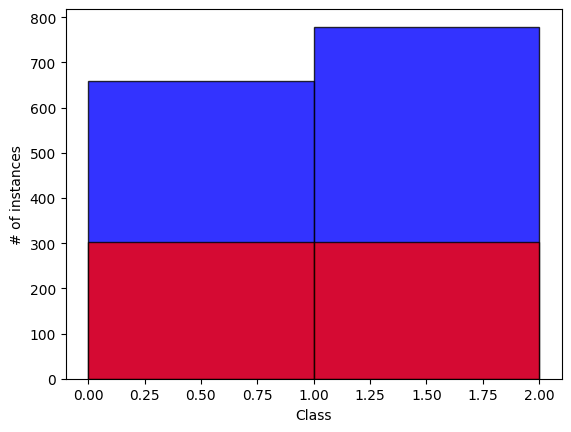

In [4]:
h1 = plt.hist(training_set.classes, bins=range(0,3), alpha=0.8, color='blue', edgecolor='black')
h2 = plt.hist(test_set.classes,  bins=range(0,3), alpha=0.8, color='red', edgecolor='black')
plt.ylabel('# of instances')
plt.xlabel('Class')

(128, 128, 128, 3) (128,)


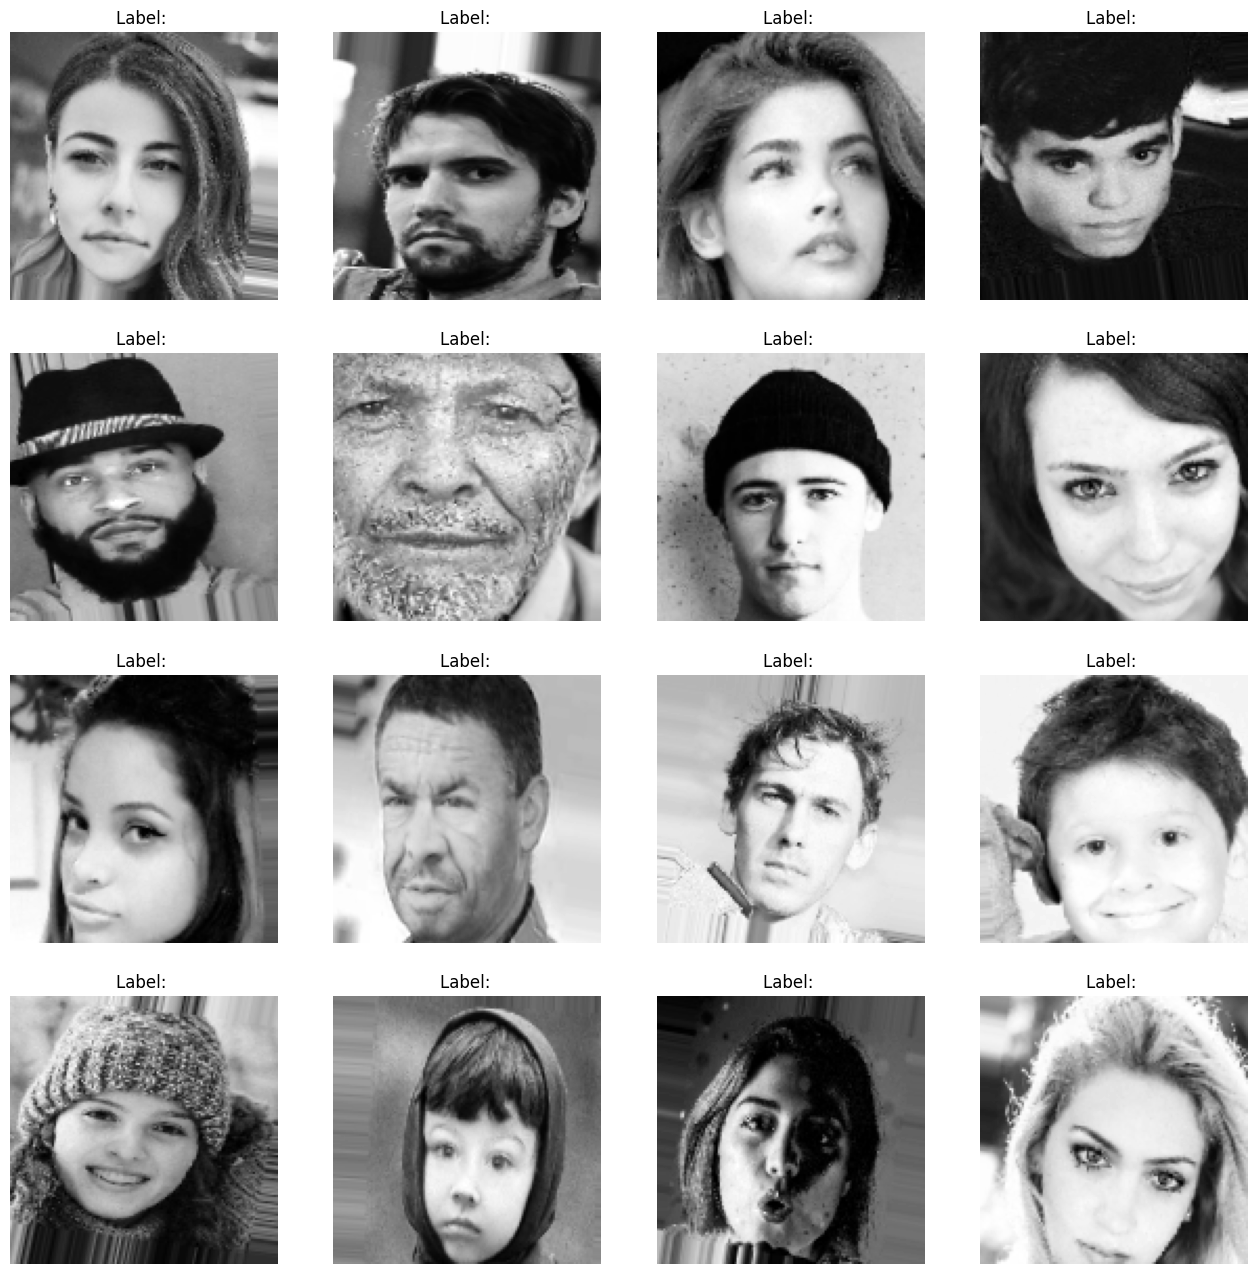

In [5]:
for X, y in training_set:
    print(X.shape, y.shape)
    plt.figure(figsize=(16,16))
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.axis('off')
        plt.title('Label: ')
        img = np.uint8(255*X[i,:,:,0])
        plt.imshow(img, cmap='gray')
    break

# Convolutional Neural Net
The data looks resonable so now I will define a CNN model to train and use within our application.

In [6]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(128,128,3)))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(3, 3),
                 activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(activation="relu",
                units=256))

model.add(Dense(activation="sigmoid",
                units=1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

##### Compile the model

In [7]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

# Training
Finally we will train our model using some keras helper functions. We are not doing any hyper-parameter optimization so we will not define a separate testing and validation set. We can however evaluate our model further in real time within the application.

In [8]:
callbacks_list = [
    EarlyStopping(monitor='val_loss', patience=10),
    ModelCheckpoint(filepath='/content/drive/MyDrive/Capp/my_mode.keras', monitor='val_loss', save_best_only=True, mode ='max'),
]

In [10]:
history = model.fit(
        training_dataset,
        steps_per_epoch=80,
        epochs=10,
        validation_data=test_set,
        validation_steps=28,
        callbacks = callbacks_list
    )

Epoch 1/10


80/80 [==============================] - 417s 5s/step - loss: 0.6893 - accuracy: 0.5404
Epoch 2/10
80/80 [==============================] - 397s 5s/step - loss: 0.6810 - accuracy: 0.5578
Epoch 3/10
80/80 [==============================] - 406s 5s/step - loss: 0.6701 - accuracy: 0.5818
Epoch 4/10
80/80 [==============================] - 405s 5s/step - loss: 0.6623 - accuracy: 0.6005
Epoch 5/10
80/80 [==============================] - 394s 5s/step - loss: 0.6525 - accuracy: 0.6069
Epoch 6/10
80/80 [==============================] - 399s 5s/step - loss: 0.6443 - accuracy: 0.6169
Epoch 7/10
80/80 [==============================] - 395s 5s/step - loss: 0.6211 - accuracy: 0.6470
Epoch 8/10
80/80 [==============================] - 435s 5s/step - loss: 0.6044 - accuracy: 0.6625
Epoch 9/10
80/80 [==============================] - 481s 6s/step - loss: 0.5845 - accuracy: 0.6773
Epoch 10/10
80/80 [==============================] - 512s 6s/step - loss: 0.5520 - accuracy: 0.7049


In [11]:
training_set.class_indices

{'fake': 0, 'real': 1}

Text(0.5, 0, '# of epochs')

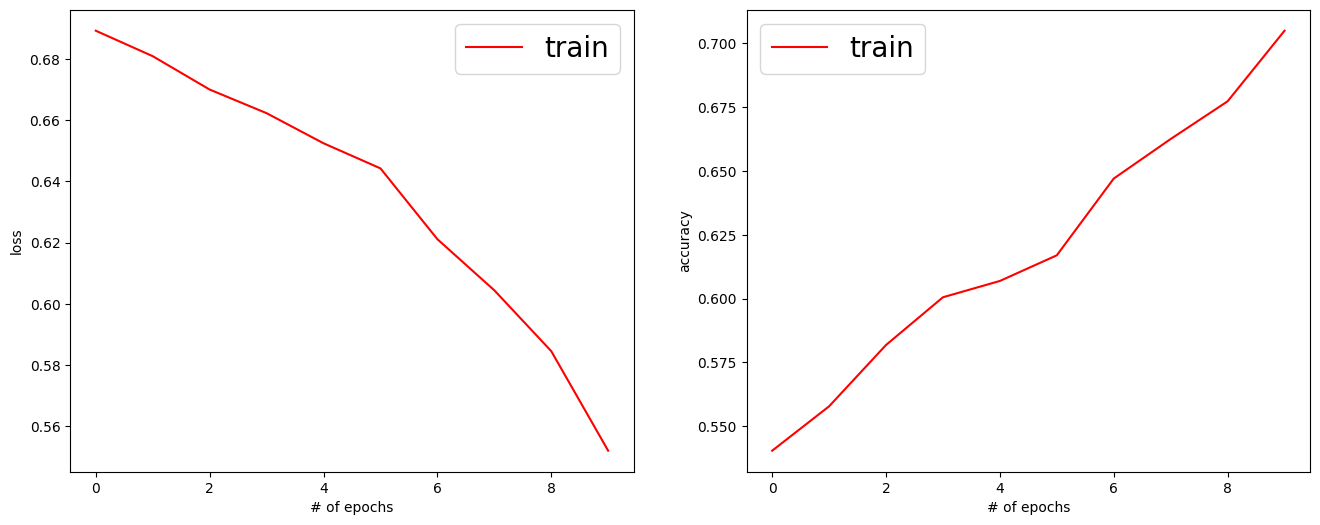

In [12]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
nepochs=len(history.history['loss'])
plt.plot(range(nepochs), history.history['loss'],     'r-', label='train')
#plt.plot(range(nepochs), history.history['val_loss'], 'b-', label='test')
plt.legend(prop={'size': 20})
plt.ylabel('loss')
plt.xlabel('# of epochs')
plt.subplot(1,2,2)
plt.plot(range(nepochs), history.history['accuracy'],     'r-', label='train')
#plt.plot(range(nepochs), history.history['val_accuracy'], 'b-', label='test')
plt.legend(prop={'size': 20})
plt.ylabel('accuracy')
plt.xlabel('# of epochs')

# Prediction
Now the model is trained so I used some real images and edited that image so that we can analysis model is working correcly or not.

In [13]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

In [14]:
def ImagePrediction(loc):
    test_image = load_img(loc, target_size = (128,128))
    plt.axis('off')
    plt.imshow(test_image)
    test_image = img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis =0)
    result = model.predict(test_image)
    if result[0][0] == 1:
        predictions = 'Fake'
    else:
        predictions = 'Real'
    print('Prediction: ',predictions)

1/1 [==============================] - 0s 496ms/step
Prediction:  Real


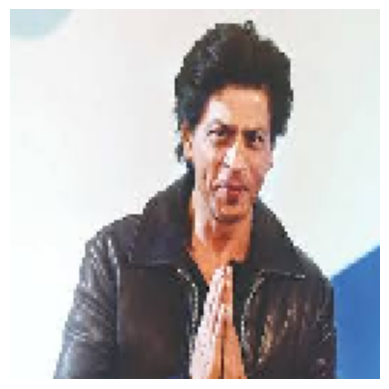

In [15]:
img = input("Enter Location of Image to predict: ")
test_image_1 = ImagePrediction(img)

1/1 [==============================] - 0s 65ms/step
Prediction:  Fake


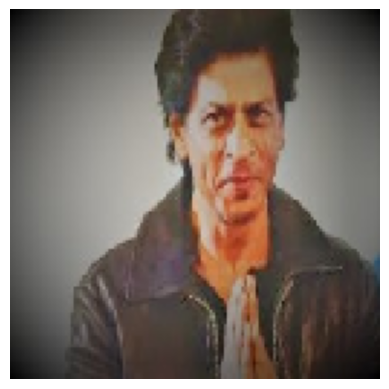

In [16]:
img = input("Enter Location of Image to predict: ")
test_image_2 = ImagePrediction(img)

1/1 [==============================] - 0s 74ms/step
Prediction:  Real


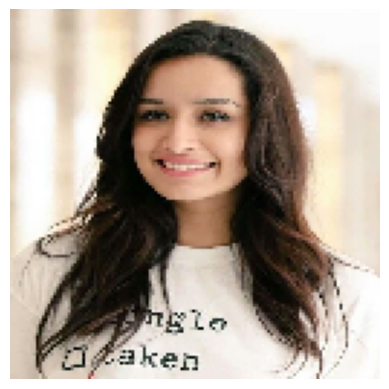

In [17]:
img = input("Enter Location of Image to predict: ")
test_image_3 = ImagePrediction(img)

1/1 [==============================] - 0s 70ms/step
Prediction:  Real


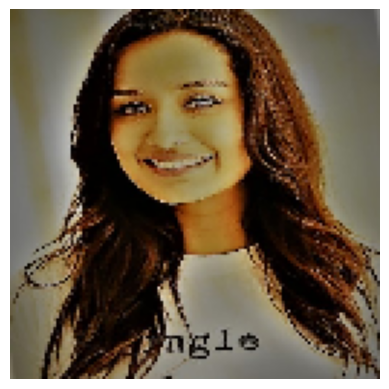

In [18]:
img = input("Enter Location of Image to predict: ")
test_image_3 = ImagePrediction(img)

## Result
3 out of 4 images is predicted correctly althrough model is not trained well by incereasing epoc near about 40 will probably make this model perfectly trained but that will require 5-6hr for training.